In [ ]:
import os
import glob
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Ruta con los archivos OD diarios
input_dir = "/data/shaday_data/GIT/movilidad/salidas_od"
archivos = sorted(glob.glob(f"{input_dir}/od_municipio_2020_*.csv"))

# Posición fija de nodos para evitar que se reordenen en cada frame
municipios_set = set()
for archivo in archivos:
    df = pd.read_csv(archivo)
    municipios_set.update(df["origen"].unique())
    municipios_set.update(df["destino"].unique())

pos = nx.spring_layout(nx.empty_graph(len(municipios_set)), seed=42)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 8))
title = ax.set_title("", fontsize=16)

def build_graph(df):
    G = nx.DiGraph()
    for _, row in df.iterrows():
        G.add_edge(row["origen"], row["destino"], weight=row["peso"])
    return G

def update(frame):
    ax.clear()
    archivo = archivos[frame]
    fecha = archivo.split("_")[-1].replace(".csv", "").replace("_", "-")
    df = pd.read_csv(archivo)
    G = build_graph(df)

    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=80)
    nx.draw_networkx_edges(G, pos, ax=ax,
                           alpha=0.5,
                           arrows=True,
                           edge_color="gray",
                           width=[G[u][v]["weight"] / 10 for u, v in G.edges()])
    title.set_text(f"Red OD - {fecha}")
    ax.axis("off")

ani = FuncAnimation(fig, update, frames=len(archivos), repeat=False)
plt.show()

: 

In [ ]:
import os
import glob
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


Matplotlib is building the font cache; this may take a moment.


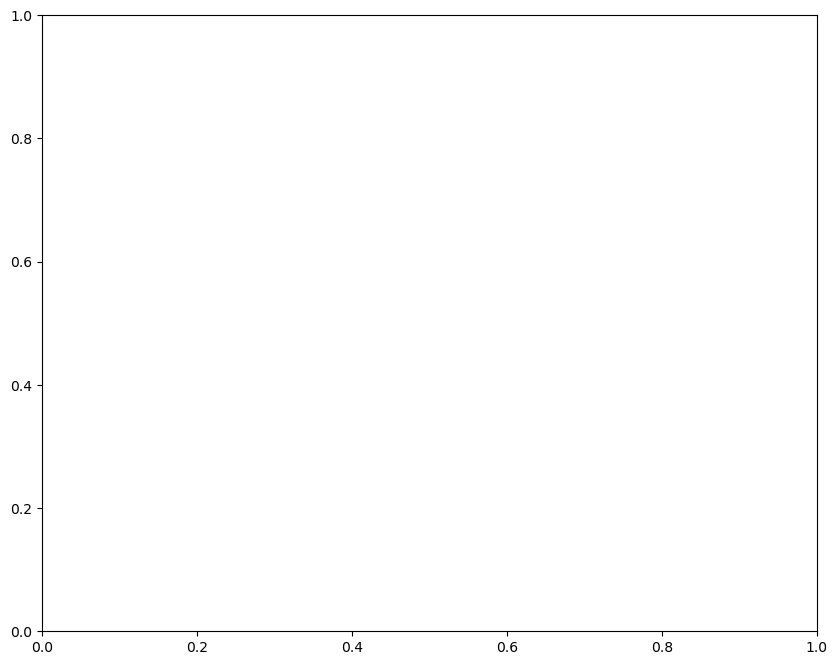

In [ ]:
# Ruta con los archivos OD diarios
input_dir = "/data/shaday_data/GIT/movilidad/salidas_od"
archivos = sorted(glob.glob(f"{input_dir}/od_municipio_2020_*.csv"))

# Posición fija de nodos para evitar que se reordenen en cada frame
municipios_set = set()
for archivo in archivos:
    df = pd.read_csv(archivo)
    municipios_set.update(df["origen"].unique())
    municipios_set.update(df["destino"].unique())

pos = nx.spring_layout(nx.empty_graph(len(municipios_set)), seed=42)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 8))
title = ax.set_title("", fontsize=16)

def build_graph(df):
    G = nx.DiGraph()
    for _, row in df.iterrows():
        G.add_edge(row["origen"], row["destino"], weight=row["peso"])
    return G

def update(frame):
    ax.clear()
    archivo = archivos[frame]
    fecha = archivo.split("_")[-1].replace(".csv", "").replace("_", "-")
    df = pd.read_csv(archivo)
    G = build_graph(df)

    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=80)
    nx.draw_networkx_edges(G, pos, ax=ax,
                           alpha=0.5,
                           arrows=True,
                           edge_color="gray",
                           width=[G[u][v]["weight"] / 10 for u, v in G.edges()])
    title.set_text(f"Red OD - {fecha}")
    ax.axis("off")

ani = FuncAnimation(fig, update, frames=len(archivos), repeat=False)
plt.show()
